In [40]:
import numpy as np
import matplotlib.pyplot as plt

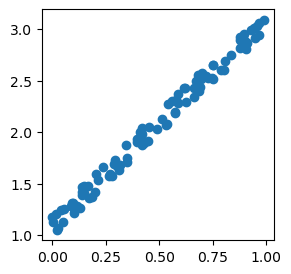

In [41]:
np.random.seed(1)

X = np.random.rand(100, 1)
y = 2. * X + 1. + np.random.rand(100, 1) * 0.2

plt.figure(figsize=(3,3))
plt.scatter(X, y)

In [42]:
# model y_hat = w1 * X +w0
# Gradient Descent to find w1 and w0

w0 = .1
w1 = .1
lr = .1

for e in range(1000):
    y_hat = w1 * X + w0 # model
    error = y_hat - y
    loss = .5 * (error**2).mean() # loss
    
    grad_w1 = (X * error).mean()
    grad_w0 = error.mean()
    
    w1 = w1 - lr * grad_w1
    w0 = w0 - lr * grad_w0

w0,w1

(1.1001098965912965, 1.993610941380254)

In [43]:
# Using torch
import torch
import torch.nn as nn # to create the models
import torch.optim as optim # to help us the parameters
torch.manual_seed(1)

In [44]:
# Converting data
X_tensor = torch.from_numpy(X).type(torch.float32)
y_tensor = torch.from_numpy(y).type(torch.float32)

In [45]:
# model y_hat = w1 * X +w0
# Gradient Descent to find w1 and w0

w0 = torch.tensor(.1, requires_grad=True)
w1 = torch.tensor(.1, requires_grad=True)

optimizer = optim.SGD([w0, w1], lr=.1)
for e in range(1000):
    y_hat = w1 * X_tensor + w0 # model
    error = y_hat - y_tensor
    loss = .5 * (error**2).mean() # loss
    
    optimizer.zero_grad()
    loss.backward() # computing the grads
    optimizer.step() # update

w0,w1

(tensor(1.1001, requires_grad=True), tensor(1.9936, requires_grad=True))

In [46]:
# model y_hat = w1 * X +w0
# Gradient Descent to find w1 and w0

w0 = torch.tensor(.1, requires_grad=True)
w1 = torch.tensor(.1, requires_grad=True)

optimizer = optim.SGD([w0, w1], lr=.1)
loss_fn = nn.MSELoss(reduction='mean')
for e in range(1000):
    y_hat = w1 * X_tensor + w0 # model
    error = y_hat - y_tensor
    loss = loss_fn(y_hat, y_tensor) # loss
    
    optimizer.zero_grad()
    loss.backward() # computing the grads
    optimizer.step() # update

w0,w1

(tensor(1.0996, requires_grad=True), tensor(1.9947, requires_grad=True))

In [55]:
model = nn.Linear(1,1) # the first one is the nb of inputs and second is nb of outputs

optimizer = optim.SGD( model.parameters(), lr=.1)
loss_fn = nn.MSELoss(reduction='mean')
print(model.state_dict())
for e in range(1000):
    y_hat = model(X_tensor) # model
    loss = loss_fn(y_hat, y_tensor) # loss
    
    optimizer.zero_grad()
    loss.backward() # computing the grads
    optimizer.step() # update

print(model.state_dict())

OrderedDict([('weight', tensor([[0.1449]])), ('bias', tensor([-0.0040]))])
OrderedDict([('weight', tensor([[1.9947]])), ('bias', tensor([1.0996]))])


In [56]:
# Model definition
class MyModel(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__
        self.linear = nn.linear(n_inputs, n_outputs)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [57]:
model = nn.Linear(1,1) # the first one is the nb of inputs and second is nb of outputs

optimizer = optim.SGD( model.parameters(), lr=.1)
loss_fn = nn.MSELoss(reduction='mean')
print(model.state_dict())
for e in range(1000):
    y_hat = model(X_tensor) # sending X_tensor to the forward function of the model
    loss = loss_fn(y_hat, y_tensor) # loss
    
    optimizer.zero_grad()
    loss.backward() # computing the grads
    optimizer.step() # update

print(model.state_dict())

OrderedDict([('weight', tensor([[0.8742]])), ('bias', tensor([0.3112]))])
OrderedDict([('weight', tensor([[1.9947]])), ('bias', tensor([1.0996]))])
